<a href="https://colab.research.google.com/github/JankoBascarevic/Masinsko-Ucenje/blob/main/Domaci2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Neophodne biblioteke

In [ ]:
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt


##Ucitavanje skupa podataka

In [ ]:
data = pd.read_csv("Real estate.csv")
data.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


##Biranje nezavisne promenljive

In [ ]:
X = data['longitude'].values
Y = data['house price of unit area'].values

#racunanje srednjih vrednosti potrebne za nalazenje k i n
mean_x = np.mean(X)
mean_y = np.mean(Y)

##Racunanje k i n

In [ ]:
sum1 = 0
sum2 = 0

#414 jer ima 414 redova u tabeli
for i in range(414):
  sum1 += (X[i] - mean_x) * (Y[i] - mean_y)
  sum2 += (X[i] - mean_x) ** 2
k = sum1 / sum2
n = mean_y - (k * mean_x)

print (f'k = {k} \nn = {n}')

k = 463.9347441251713 
n = -56345.56858531252


##Crtanje grafika

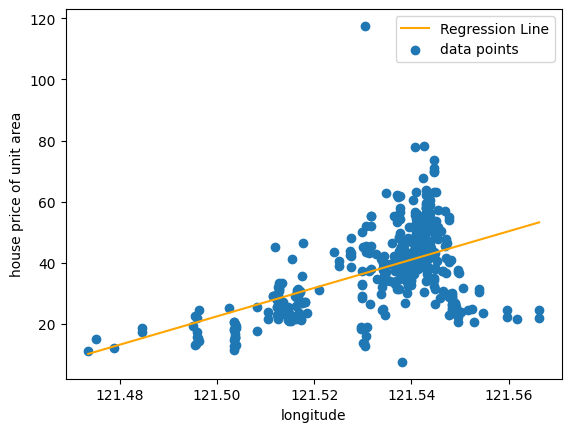

In [ ]:

max_x = np.max(X)
min_x = np.min(X)


x = np.linspace (min_x, max_x)
y = k*x+n

plt.plot(x, y, color='orange', label='Regression Line')
plt.scatter(X, Y, label='data points')

plt.xlabel('longitude')
plt.ylabel('house price of unit area')
plt.legend()
plt.show()


##Racunanje rmse

In [ ]:

s= 0

for i in range(414):
  y_pred = n + k * X[i] #ocekivano y
  s += ((Y[i] - y_pred) ** 2)/(i+1)
rmse = s**(1/2)
print(rmse)





22.582424545045257


##Racunanje mae

In [ ]:

s1=0

for i in range(414):
  y_pred = n + k * X[i] #ocekivano y
  s1 += ((Y[i] - y_pred) ** 2)**(1/2)
mae = (1/414)*s1
print(mae)

8.265761945495512


Za nezavisnu promenljivu x sam uzeo geografsku duzinu jer sa grafika sa prethodnog domaceg delovala mi je da bi mogla da ima korektnu linearnu funkciju, za razliku od ostalih.